In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
np.random.seed(1)

## - Outline of the Assignment

To build your neural network, you will be implementing several "helper functions". These helper functions will be used in the next assignment to build a two-layer neural network and an L-layer neural network. Each small helper function you will implement will have detailed instructions that will walk you through the necessary steps. Here is an outline of this assignment, you will:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network.
- Implement the forward propagation module (shown in purple in the figure below).
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - We give you the ACTIVATION function (relu/sigmoid).
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
    - Complete the LINEAR part of a layer's backward propagation step.
    - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters.

<img src="images/final outline.png" style="width:800px;height:500px;">
<caption><center> **Figure 1**</center></caption><br>


**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This assignment will show you exactly how to carry out each of these steps. 

## - Initialization

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

### - L-layer Neural Network
<img src="images/Screenshot from 2020-11-17 16-38-48.png" style="width:800px;height:500px;">

**Exercise**: Implement initialization for an L-layer Neural Network. 

**Instructions**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.randn(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims` for the "Planar Data classification model" from last week would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [242]:
def initialize_parameters_deep(layer_dim):
    """
    Argument:
    layer_dim -- python array containing the dimension of each layer in our network
    
    Return:
    parameters -- python dictionary containing your parameters 'W1, b1, W2, b2, ..., Wl, bl':
        Wl -- weight matrix of shape (layer_dim[l], layer_dim[l - 1])
        bl -- bias vector of shape (layer_dim[l], 1)
    """
    parameters = {}
    np.random.seed(1)
    
    for l in range(1, len(layer_dim)):
        parameters['W' + str(l)] = np.random.randn(
            layer_dim[l], 
            layer_dim[l - 1])/ np.sqrt(layer_dim[l-1]) #* 0.01
#             layer_dim[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dim[l], 1))
    return parameters

In [243]:
initialize_parameters_deep([1,2,3,4,5])

{'W1': array([[ 1.62434536],
        [-0.61175641]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[-0.37347383, -0.75870339],
        [ 0.6119356 , -1.62743362],
        [ 1.23376823, -0.53825456]]),
 'b2': array([[0.],
        [0.],
        [0.]]),
 'W3': array([[ 0.18419731, -0.14397405,  0.84414841],
        [-1.18942279, -0.18614766, -0.22173389],
        [ 0.65458209, -0.63502252, -0.09955147],
        [-0.50683179,  0.02437212,  0.33648852]]),
 'b3': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W4': array([[-0.55030959,  0.57236185,  0.45079536,  0.25124717],
        [ 0.45042797, -0.34186393, -0.06144511, -0.46788472],
        [-0.13394404,  0.26517773, -0.34583038, -0.19837676],
        [-0.34358635, -0.42260282, -0.33562307, -0.0063323 ],
        [-0.55865517,  0.11720785,  0.82990109,  0.37102208]]),
 'b4': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])}

## - Forward propagation module

### - Linear Forward 
Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

**Exercise**: Build the linear part of forward propagation.

**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

In [159]:
def linear_forward(a, w, b):
    """
    Arguments:
    a -- activations of previous layer (or input data): (size of previous layer, number of examples)
    w -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector: numpy array of shape (size of current layer, 1)
    
    Returns:
    z -- the input of activation function, also called pre-activation parameter
    cache -- a python tuple containing 'a', 'w', 'b'
    """
    z = np.dot(w, a) + b
    cache = (a, w, b)
    return z, cache

### - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [160]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Argument:
    z -- A scalar or numpy array of any size
    
    Return:
    a -- post-activation parameter, of the same shape as z
    z -- pre-activation parameter
    """
    a = 1/(1 + np.exp(-z))
    return a, z

In [161]:
def relu(z):
    """
    Compute the relu of z
    Argument:
    z -- A scalar or numpy array of any size
    
    Return:
    a -- post-activation parameter, of the same shape as z
    z -- pre-activation parameter
    """
    a = np.maximum(0, z)
    return a, z

### - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

In [162]:
def linear_activation_forward(a_previous, w, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer
    
    Arguments:
    a_previous -- activations from previous layer (or input data): (size of previous layer, number of examples)
    w -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector: numpy array of shape (size of current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string 
    
    Returns:
    a -- the output of the activation function, also called the post-activation value
    cache -- containing linear cache, activation cache
    """
    if activation == 'sigmoid':
        z, linear_cache = linear_forward(a_previous, w, b)
        a, activation_cache = sigmoid(z)
    elif activation == 'relu':
        z, linear_cache = linear_forward(a_previous, w, b)
        a, activation_cache = relu(z)
    return a, (linear_cache, activation_cache)
    

### L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

<img src="images/model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> **Figure 2** : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>

**Exercise**: Implement the forward propagation of the above model.

**Instruction**: In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.) 

**Tips**:
- Use the functions you had previously written 
- Use a for loop to replicate [LINEAR->RELU] (L-1) times
- Don't forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, you can use `list.append(c)`.

In [163]:
def l_model_forward(x, parameters):
    """
    Implement forward propagation for the [LINEAR -> RELU] * (L - 1) -> LINEAR -> SIGMOID computation
    Arguments:
    x -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize parameter deep
    
    Returns:
    al -- last post-activation value
    caches -- list of cache
    """
    caches = []
    A = x
    L = len(parameters)//2
    
    for l in range(1, L + 1):
        A_previous = A
        if l < L:
            # implement [LINEAR -> RELU] * (L -1). Add cache to the caches list
            w = parameters.get('W'+str(l))
            b = parameters.get('b'+str(l))
            A, cache = linear_activation_forward(A_previous, w, b, activation = 'relu')
            caches.append(cache)
        elif l == L:
            # implement LINEAR -> SIGMOID. Add cache to the caches list
            w = parameters.get('W'+str(L))
            b = parameters.get('b'+str(L))
            A, cache = linear_activation_forward(A_previous, w, b, activation = 'sigmoid')
            caches.append(cache)
            
    return A, caches

In [164]:
X = np.array([[-0.31178367,  0.72900392,  0.21782079, -0.8990918 ],
       [-2.48678065,  0.91325152,  1.12706373, -1.51409323],
       [ 1.63929108, -0.4298936 ,  2.63128056,  0.60182225],
       [-0.33588161,  1.23773784,  0.11112817,  0.12915125],
       [ 0.07612761, -0.15512816,  0.63422534,  0.810655  ]])

In [165]:
parameters = {'W1': np.array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
        [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
        [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
        [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]),
 'W2': np.array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
        [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
        [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]),
 'W3': np.array([[ 0.9398248 ,  0.42628539, -0.75815703]]),
 'b1': np.array([[ 1.38503523],
        [-0.51962709],
        [-0.78015214],
        [ 0.95560959]]),
 'b2': np.array([[ 1.50278553],
        [-0.59545972],
        [ 0.52834106]]),
 'b3': np.array([[-0.16236698]])}

In [166]:
al, caches = l_model_forward(X, parameters)
al

array([[0.03921668, 0.70498921, 0.19734387, 0.04728177]])

## - Cost function

Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.

**Exercise**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [167]:
def compute_cost(al, y):
    """
    Implement the cost function defined by equation
    
    Arguments:
    al -- probability vector corresponding to your label predictions, shape(1, number of examples)
    y -- true label vector, shape(1, number of examples)
    
    Return:
    cost -- cross entropy cost
    """
    # number of examples
    m = y.shape[1]
    
    logprobs = - (np.multiply(y, np.log(al)) + np.multiply(1 - y, np.log(1 - al)))
    cost = np.sum(logprobs)/m
    return cost

In [168]:
y = np.array([[1, 1, 0]])
y

array([[1, 1, 0]])

In [169]:
al = np.array([[ 0.8,  0.9,  0.4]])
al

array([[0.8, 0.9, 0.4]])

In [170]:
compute_cost(al, y)

0.2797765635793423

## - Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

**Reminder**: 
<img src="images/backprop_kiank.png" style="width:650px;height:250px;">
<caption><center> **Figure 3** : Forward and Backward propagation for *LINEAR->RELU->LINEAR->SIGMOID* <br> *The purple blocks represent the forward propagation, and the red blocks represent the backward propagation.*  </center></caption>

<!-- 
For those of you who are expert in calculus (you don't need to be to do this assignment), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, you use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During the backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

Now, similar to forward propagation, you are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

### - Linear backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center> **Figure 4** </center></caption>

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


In [171]:
def linear_backward(dz, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)
    
    Arguments:
    dz -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (a_previous, w, b) coming from the forward propagation in the current layer
    
    Returns:
    da_previous -- gradient of the cost with respect to the activation (of the previous layer l - 1), same
    shape as a_previous
    dw -- gradient of the cost with respect to w (current layer l), same shape as w
    db -- gradient of the cost with respect to b (current layer l), same shape as b
    """
    a_previous, w, b = cache
    m = a_previous.shape[1]
    
    dw = np.dot(dz, a_previous.T)/m
    db = np.sum(dz, axis=1, keepdims = True)/m
    da_previous = np.dot(w.T, dz)
    return da_previous, dw, db

In [172]:
dz = np.array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ,  1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038,  1.46210794, -2.06014071]])

In [173]:
linear_cache = (np.array([[-0.3224172 , -0.38405435,  1.13376944, -1.09989127],
        [-0.17242821, -0.87785842,  0.04221375,  0.58281521],
        [-1.10061918,  1.14472371,  0.90159072,  0.50249434],
        [ 0.90085595, -0.68372786, -0.12289023, -0.93576943],
        [-0.26788808,  0.53035547, -0.69166075, -0.39675353]]),
 np.array([[-0.6871727 , -0.84520564, -0.67124613, -0.0126646 , -1.11731035],
        [ 0.2344157 ,  1.65980218,  0.74204416, -0.19183555, -0.88762896],
        [-0.74715829,  1.6924546 ,  0.05080775, -0.63699565,  0.19091548]]),
 np.array([[ 2.10025514],
        [ 0.12015895],
        [ 0.61720311]]))

In [174]:
linear_backward(dz, linear_cache)

(array([[-1.15171336,  0.06718465, -0.32046959,  2.09812711],
        [ 0.6034588 , -3.72508703,  5.81700741, -3.84326836],
        [-0.4319552 , -1.30987418,  1.72354703,  0.05070578],
        [-0.38981415,  0.60811244, -1.25938424,  1.47191593],
        [-2.52214925,  2.67882551, -0.67947465,  1.48119548]]),
 array([[ 0.07313866, -0.0976715 , -0.87585828,  0.73763362,  0.00785716],
        [ 0.85508818,  0.37530413, -0.59912656,  0.71278189, -0.58931808],
        [ 0.97913304, -0.24376493, -0.08839671,  0.55151192, -0.10290907]]),
 array([[-0.14713785],
        [-0.11313155],
        [-0.13209101]]))

### - Linear-Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Exercise**: Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [175]:
def sigmoid_backward(da, cache):
    """
    Implement the backward propagation for a single sigmoid
    
    Arguments:
    da -- post-activation gradient, of any shape
    cache -- 'z'
    
    Return:
    dz -- gradient of the cost with respect to z
    """
    z = cache
    a, _ = sigmoid(z)
    dz = da * a * (1 - a)
    
    return dz

In [176]:
def relu_backward(da, cache):
    """
    Implement the backward propagation for a single relu
    
    Arguments:
    da -- post-activation gradient, of any shape
    cache -- 'z'
    
    Returns:
    dz -- gradient of the cost with respect to z
    """
    z = cache
    dz = np.array(da, copy = True) # just converting dz to a correct object
    
    # when z <= 0, you should set dz to 0 as well
    dz[z <= 0] = 0
    
    return dz

In [177]:
def linear_activation_backward(da, cache, activation):
    """
    Implement the backward propagation for the LINEAR -> ACTIVATION layer
    
    Arguments:
    da -- post-activation gradient for current layer l
    cache -- tuple of (linear cache, activation cache)
    activation -- the activation to be used in this layer, stored as a text string: 'sigmoid' or 'relu'
    
    Returns:
    da_previous -- gradient of the cost with respect to the activation (of the previous layer l - 1), same
    shape as a_previous
    dw -- gradient of the cost with respect to w (current layer l), same shape as w
    db -- gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == 'relu':
        dz = relu_backward(da, activation_cache)
        da_previous, dw, db = linear_backward(dz, linear_cache)
    elif activation == 'sigmoid':
        dz = sigmoid_backward(da, activation_cache)
        da_previous, dw, db = linear_backward(dz, linear_cache)

    return da_previous, dw, db

In [178]:
da_previous = np.array([[-0.41675785, -0.05626683]])
da_previous

array([[-0.41675785, -0.05626683]])

In [179]:
linear_activation_cache = ((np.array([[-2.1361961 ,  1.64027081],
         [-1.79343559, -0.84174737],
         [ 0.50288142, -1.24528809]]),
  np.array([[-1.05795222, -0.90900761,  0.55145404]]),
  np.array([[ 2.29220801]])),
 np.array([[ 0.04153939, -1.11792545]]))

In [180]:
da_prev, dw, db = linear_activation_backward(da_previous, linear_activation_cache, activation='sigmoid')

In [181]:
da_prev, dw, db

(array([[ 0.11017994,  0.0110534 ],
        [ 0.09466817,  0.00949723],
        [-0.05743092, -0.00576155]]),
 array([[ 0.10266786,  0.09778551, -0.01968084]]),
 array([[-0.05729622]]))

In [182]:
da_prev, dw, db = linear_activation_backward(da_previous, linear_activation_cache, activation='relu')

In [183]:
da_prev, dw, db

(array([[ 0.44090989, -0.        ],
        [ 0.37883606, -0.        ],
        [-0.2298228 ,  0.        ]]),
 array([[ 0.44513825,  0.37371418, -0.10478989]]),
 array([[-0.20837892]]))

### - L-Model Backward 

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 


<img src="images/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  **Figure 5** : Backward pass  </center></caption>

** Initializing backpropagation**:
To backpropagate through this network, we know that the output is, 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

**Exercise**: Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [184]:
def l_model_backward(al, y, caches):
    """
    Implement the backward propagation for the [LINEAR -> RELU] * (l - 1) -> LINEAR -> SIGMOID
    
    Arguments:
    al -- probability vector, output of the forward propagation (l_model_forward() function)
    y -- true 'label' vector
    caches -- list of caches
    
    Returns:
    grads -- a dictionary with the gradients
            grads['da' + str(l)] = ...
            grads['dw' + str(l)] = ...
            grads['db' + str(l)] = ...
    """
    grads = {}
    L = len(caches)
    m = y.shape[1]
    
    dal = -(np.divide(y, al) - np.divide(1 - y, 1 - al))
    current_cache = caches[L - 1]
    
    temp_da_prev, temp_dw, temp_db = linear_activation_backward(dal, 
                                                           current_cache, 
                                                           activation = 'sigmoid')
    grads['da' + str(L - 1)] = temp_da_prev
    grads['dw' + str(L)] = temp_dw
    grads['db' + str(L)] = temp_db

    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        temp_da_prev, temp_dw, temp_db = linear_activation_backward(grads['da'+str(l + 1)], 
                                                               current_cache, 
                                                               activation = 'relu')
        grads['da' + str(l)] = temp_da_prev
        grads['dw' + str(l + 1)] = temp_dw
        grads['db' + str(l + 1)] = temp_db
    
    return grads

In [185]:
al = np.array([[ 1.78862847,  0.43650985]])

In [186]:
Y_assess = np.array([[1, 0]])

In [187]:
caches = (((np.array([[ 0.09649747, -1.8634927 ],
          [-0.2773882 , -0.35475898],
          [-0.08274148, -0.62700068],
          [-0.04381817, -0.47721803]]),
   np.array([[-1.31386475,  0.88462238,  0.88131804,  1.70957306],
          [ 0.05003364, -0.40467741, -0.54535995, -1.54647732],
          [ 0.98236743, -1.10106763, -1.18504653, -0.2056499 ]]),
   np.array([[ 1.48614836],
          [ 0.23671627],
          [-1.02378514]])),
  np.array([[-0.7129932 ,  0.62524497],
         [-0.16051336, -0.76883635],
         [-0.23003072,  0.74505627]])),
 ((np.array([[ 1.97611078, -1.24412333],
          [-0.62641691, -0.80376609],
          [-2.41908317, -0.92379202]]),
   np.array([[-1.02387576,  1.12397796, -0.13191423]]),
   np.array([[-1.62328545]])),
  np.array([[ 0.64667545, -0.35627076]])))

In [188]:
grads = l_model_backward(al, Y_assess, caches)
grads

{'da1': array([[ 0.12913162, -0.44014127],
        [-0.14175655,  0.48317296],
        [ 0.01663708, -0.05670697]]),
 'dw2': array([[-0.39202432, -0.13325855, -0.04601089]]),
 'db2': array([[0.15187861]]),
 'da0': array([[ 0.        ,  0.52257901],
        [ 0.        , -0.3269206 ],
        [ 0.        , -0.32070404],
        [ 0.        , -0.74079187]]),
 'dw1': array([[0.41010002, 0.07807203, 0.13798444, 0.10502167],
        [0.        , 0.        , 0.        , 0.        ],
        [0.05283652, 0.01005865, 0.01777766, 0.0135308 ]]),
 'db1': array([[-0.22007063],
        [ 0.        ],
        [-0.02835349]])}

### - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 


In [189]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    Arguments:
    parameters -- your parameters
    grads -- output of l_model_backward
    learning_rate -- learning rate
    
    Return:
    parameters -- update your parameters
    """
    L = len(parameters)//2
    for l in range(L):
        parameters['W' + str(l + 1)] -= learning_rate * grads['dw' + str(l + 1)] 
        parameters['b' + str(l + 1)] -= learning_rate * grads['db' + str(l + 1)]

    return parameters

## - L-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def l_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def l_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [240]:
def l_layer_model(
    X, 
    y, 
    layer_dims, 
    learning_rate = 0.0075, 
    num_iterations = 3000, 
    print_cost = False
    ):
    """
    Implement a L-layer neural network: [LINEAR -> RELU] * (L - 1) -> LINEAR -> SIGMOID
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    y -- true 'label' vector of shape (1, number of examples)
    layer_dims -- list containing the input size and each layer size
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if true, it prints the cost every 100 steps
    
    Return:
    parameters -- parameters learned by the model. They can then be used to predict
    """
    np.random.seed(1)
    
    # parameters initialize 
    parameters = initialize_parameters_deep(layer_dims)
    
    # keep track of cost
    costs = []
    
    # loop
    for i in range(num_iterations):
        # forward propagation [LINEAR -> RELU] * (L - 1)
        AL, caches = l_model_forward(X, parameters)
        
        # compute cost
        cost = compute_cost(AL, y)
        if print_cost and i % 1000 == 0:
            print(f'==cost={cost} after {i} iterations')
            costs.append(cost)
        
        # backward propagation
        grads = l_model_backward(AL, y, caches)
        
        # update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [191]:
import h5py

In [192]:
def load_data():
    train_dataset = h5py.File('notebook/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('notebook/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [193]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [194]:
train_x_orig.shape

(209, 64, 64, 3)

In [195]:
train_y.shape

(1, 209)

In [196]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [197]:
train_y[0, 11]

1

y = 1. It's a cat picture.


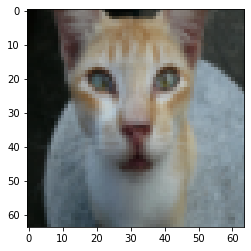

In [198]:
index = 11
plt.imshow(train_x_orig[index])
print (
    "y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") +  " picture.")

In [199]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
train_x_flatten.shape

(12288, 209)

In [200]:
train_x = train_x_flatten/255
train_x.shape

(12288, 209)

In [201]:
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
test_x_flatten.shape

(12288, 50)

In [202]:
test_x = test_x_flatten/255
test_x.shape

(12288, 50)

In [215]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [238]:
parameters = initialize_parameters_deep(layers_dims)
parameters

{'W1': array([[ 0.01624345, -0.00611756, -0.00528172, ..., -0.00527214,
         -0.0038034 ,  0.00949412],
        [ 0.01009231,  0.00229889, -0.00664099, ...,  0.00689859,
         -0.00488322,  0.0020761 ],
        [-0.0035634 , -0.00195481,  0.00636803, ...,  0.00822751,
         -0.00104425, -0.00657957],
        ...,
        [ 0.00174745, -0.00130162,  0.01835827, ..., -0.00922606,
         -0.00824792, -0.00153355],
        [-0.0003495 , -0.00417018, -0.0085517 , ...,  0.02247331,
         -0.00533637, -0.00029554],
        [-0.01434299, -0.01110641,  0.00726317, ...,  0.0219863 ,
          0.01538192,  0.00746604]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 9.06010848e-03, -1.37984045e-02, -1.68807982e-02,
         -1.7

==cost=0.7717493284237686 after 0 iterations
==cost=0.31518698886006163 after 1000 iterations
==cost=0.11382060668633714 after 2000 iterations
==cost=0.07332386975670677 after 3000 iterations
==cost=0.05906589592672247 after 4000 iterations
==cost=0.053612301249977054 after 5000 iterations
==cost=0.05216407724658612 after 6000 iterations
==cost=0.050787598083934 after 7000 iterations
==cost=0.05022870491160466 after 8000 iterations
==cost=0.0499163845986587 after 9000 iterations


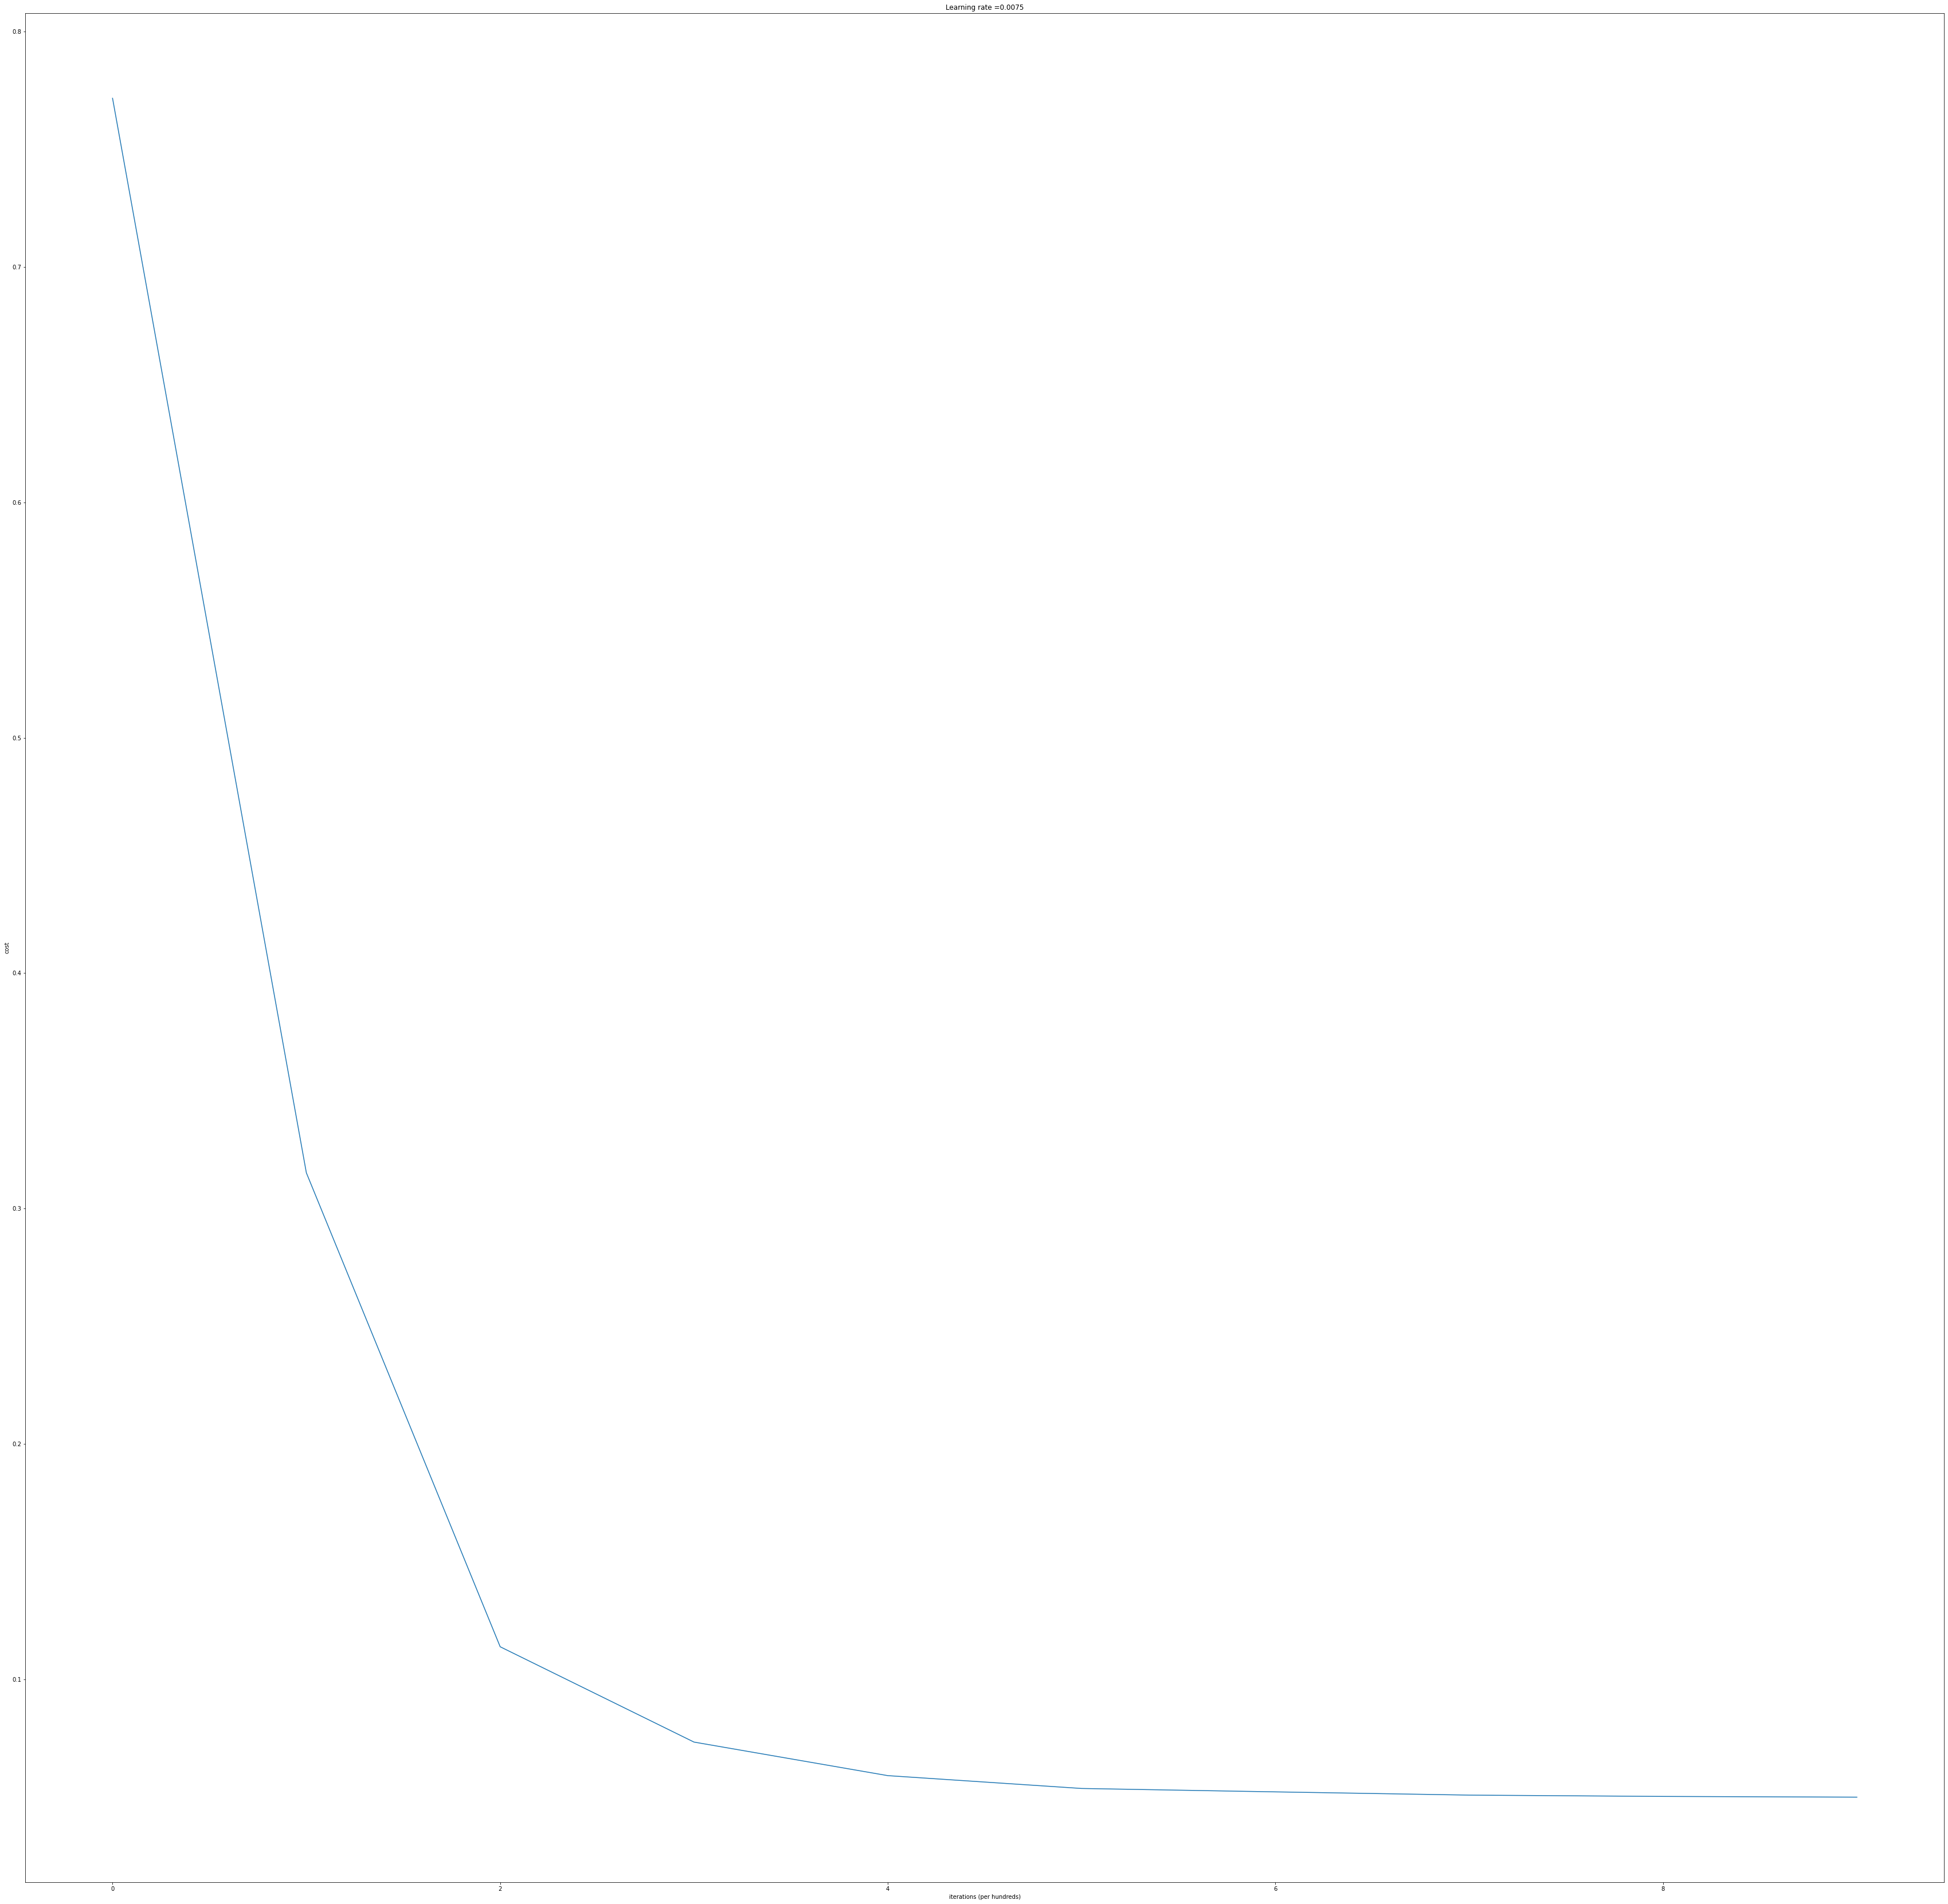

In [244]:
parameters = l_layer_model(
    train_x, 
    train_y, 
    layers_dims, 
    num_iterations=10000, 
    print_cost=True)

In [206]:
def predict(X, parameters):
    """
    Arguments:
    parameters -- containing learned parameters
    X -- input data of size (n_x, m)
    
    returns:
    predictions -- vector of predictions of our model
    """
    AL, cache = l_model_forward(X, parameters)
    print(f'--al={AL}')
    predictions = np.where(AL >= 0.5, 1, 0)
    
    return predictions

In [245]:
predictions = predict(train_x, parameters)

--al=[[0.01411024 0.01695496 0.99966747 0.01695496 0.01429457 0.01695496
  0.01695496 0.9999637  0.01668358 0.01413043 0.01507003 0.99957995
  0.01475919 0.99999798 0.99942205 0.01484067 0.01695496 0.01695496
  0.01472146 0.99999845 0.01443209 0.01412497 0.01447536 0.01668226
  0.99992214 0.99962726 0.01493454 0.99992523 0.01419432 0.99894284
  0.01408693 0.0147288  0.01669044 0.01493077 0.01425393 0.0166831
  0.01695496 0.01670382 0.99721466 0.01409308 0.01695496 0.9988398
  0.99995861 0.01669193 0.01420475 0.01442459 0.01443703 0.99943196
  0.01695496 0.01668119 0.99823376 0.01695496 0.01481058 0.01407411
  0.99975733 0.01695496 0.99994413 0.99898964 0.01695496 0.99997476
  0.99999708 0.99974835 0.01695496 0.01695496 0.0166907  0.01668611
  0.01451593 0.01496047 0.01695496 0.01695496 0.01421535 0.99999998
  0.01668549 0.01421086 0.01454687 0.01544436 0.01695496 0.01487434
  0.01695496 0.01695496 0.01695496 0.01695496 0.01695496 0.99988502
  0.99951825 0.01429399 0.01464332 0.01410958

In [208]:
def measure_accuracy(prediction, y):
    return float(np.sum(prediction == y)/y.shape[1]) * 100

In [246]:
measure_accuracy(predictions, train_y)

99.04306220095694

In [247]:
predictions_test = predict(test_x, parameters)

--al=[[0.99997347 0.99978389 0.99280743 0.98738346 0.99883133 0.91954438
  0.73876398 0.99998392 0.99896847 0.99613135 0.99980278 0.90514471
  0.9993515  0.99999984 0.01695496 0.99983745 0.07453655 0.9995475
  0.85834443 0.02780785 0.99986745 0.09518624 0.01695496 0.95303409
  0.97340835 0.99957041 0.99884309 0.01695496 0.06542055 0.99993382
  0.97656927 0.99999914 0.99967127 0.9968784  0.93717392 0.01695496
  0.02131602 0.96911098 0.97434312 0.01695496 0.99431676 0.99590617
  0.84613364 0.01695496 0.99115015 0.99994643 0.41490389 0.99999999
  0.32461248 0.02925489]]


In [248]:
measure_accuracy(predictions_test, test_y)

78.0

In [249]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (60.0, 60.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

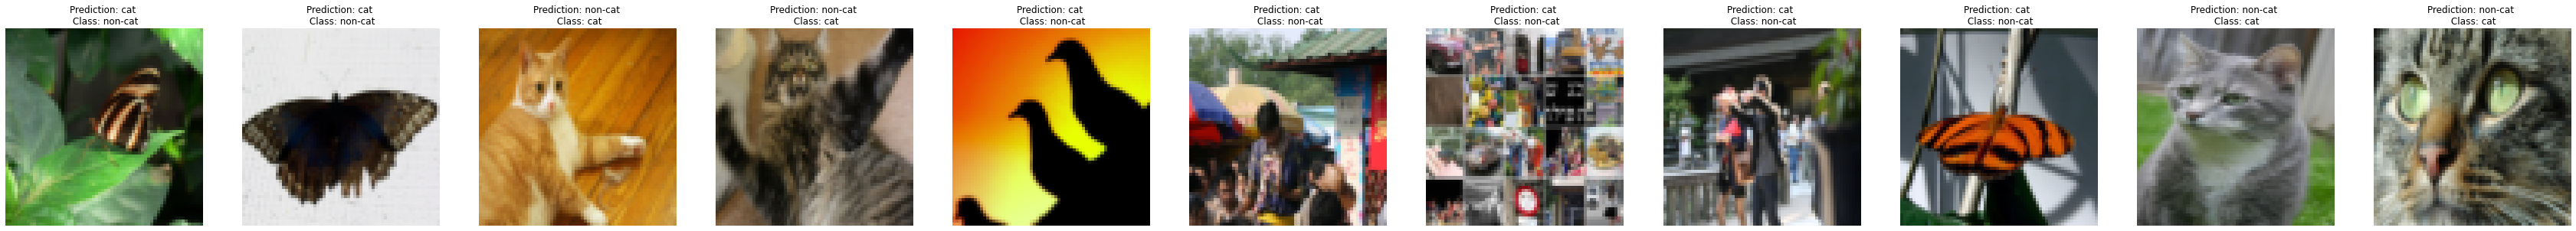

In [250]:
print_mislabeled_images(classes, test_x, test_y, predictions_test)

In [234]:
classes[0].decode('utf-8')

'non-cat'

In [212]:
import imageio

In [213]:
def read_image_and_predict(file_path):
    try:
        num_px = 64
        image = np.array(imageio.imread(file_path))
        plt.imshow(image)
        image_reshape = np.resize(image, (3 * num_px**2, 1))/255
        prediction = predict(image_reshape, parameters)
        return prediction
    except Exception as e:
        print(e)
        return None

--al=[[0.49238668]]


array([[0]])

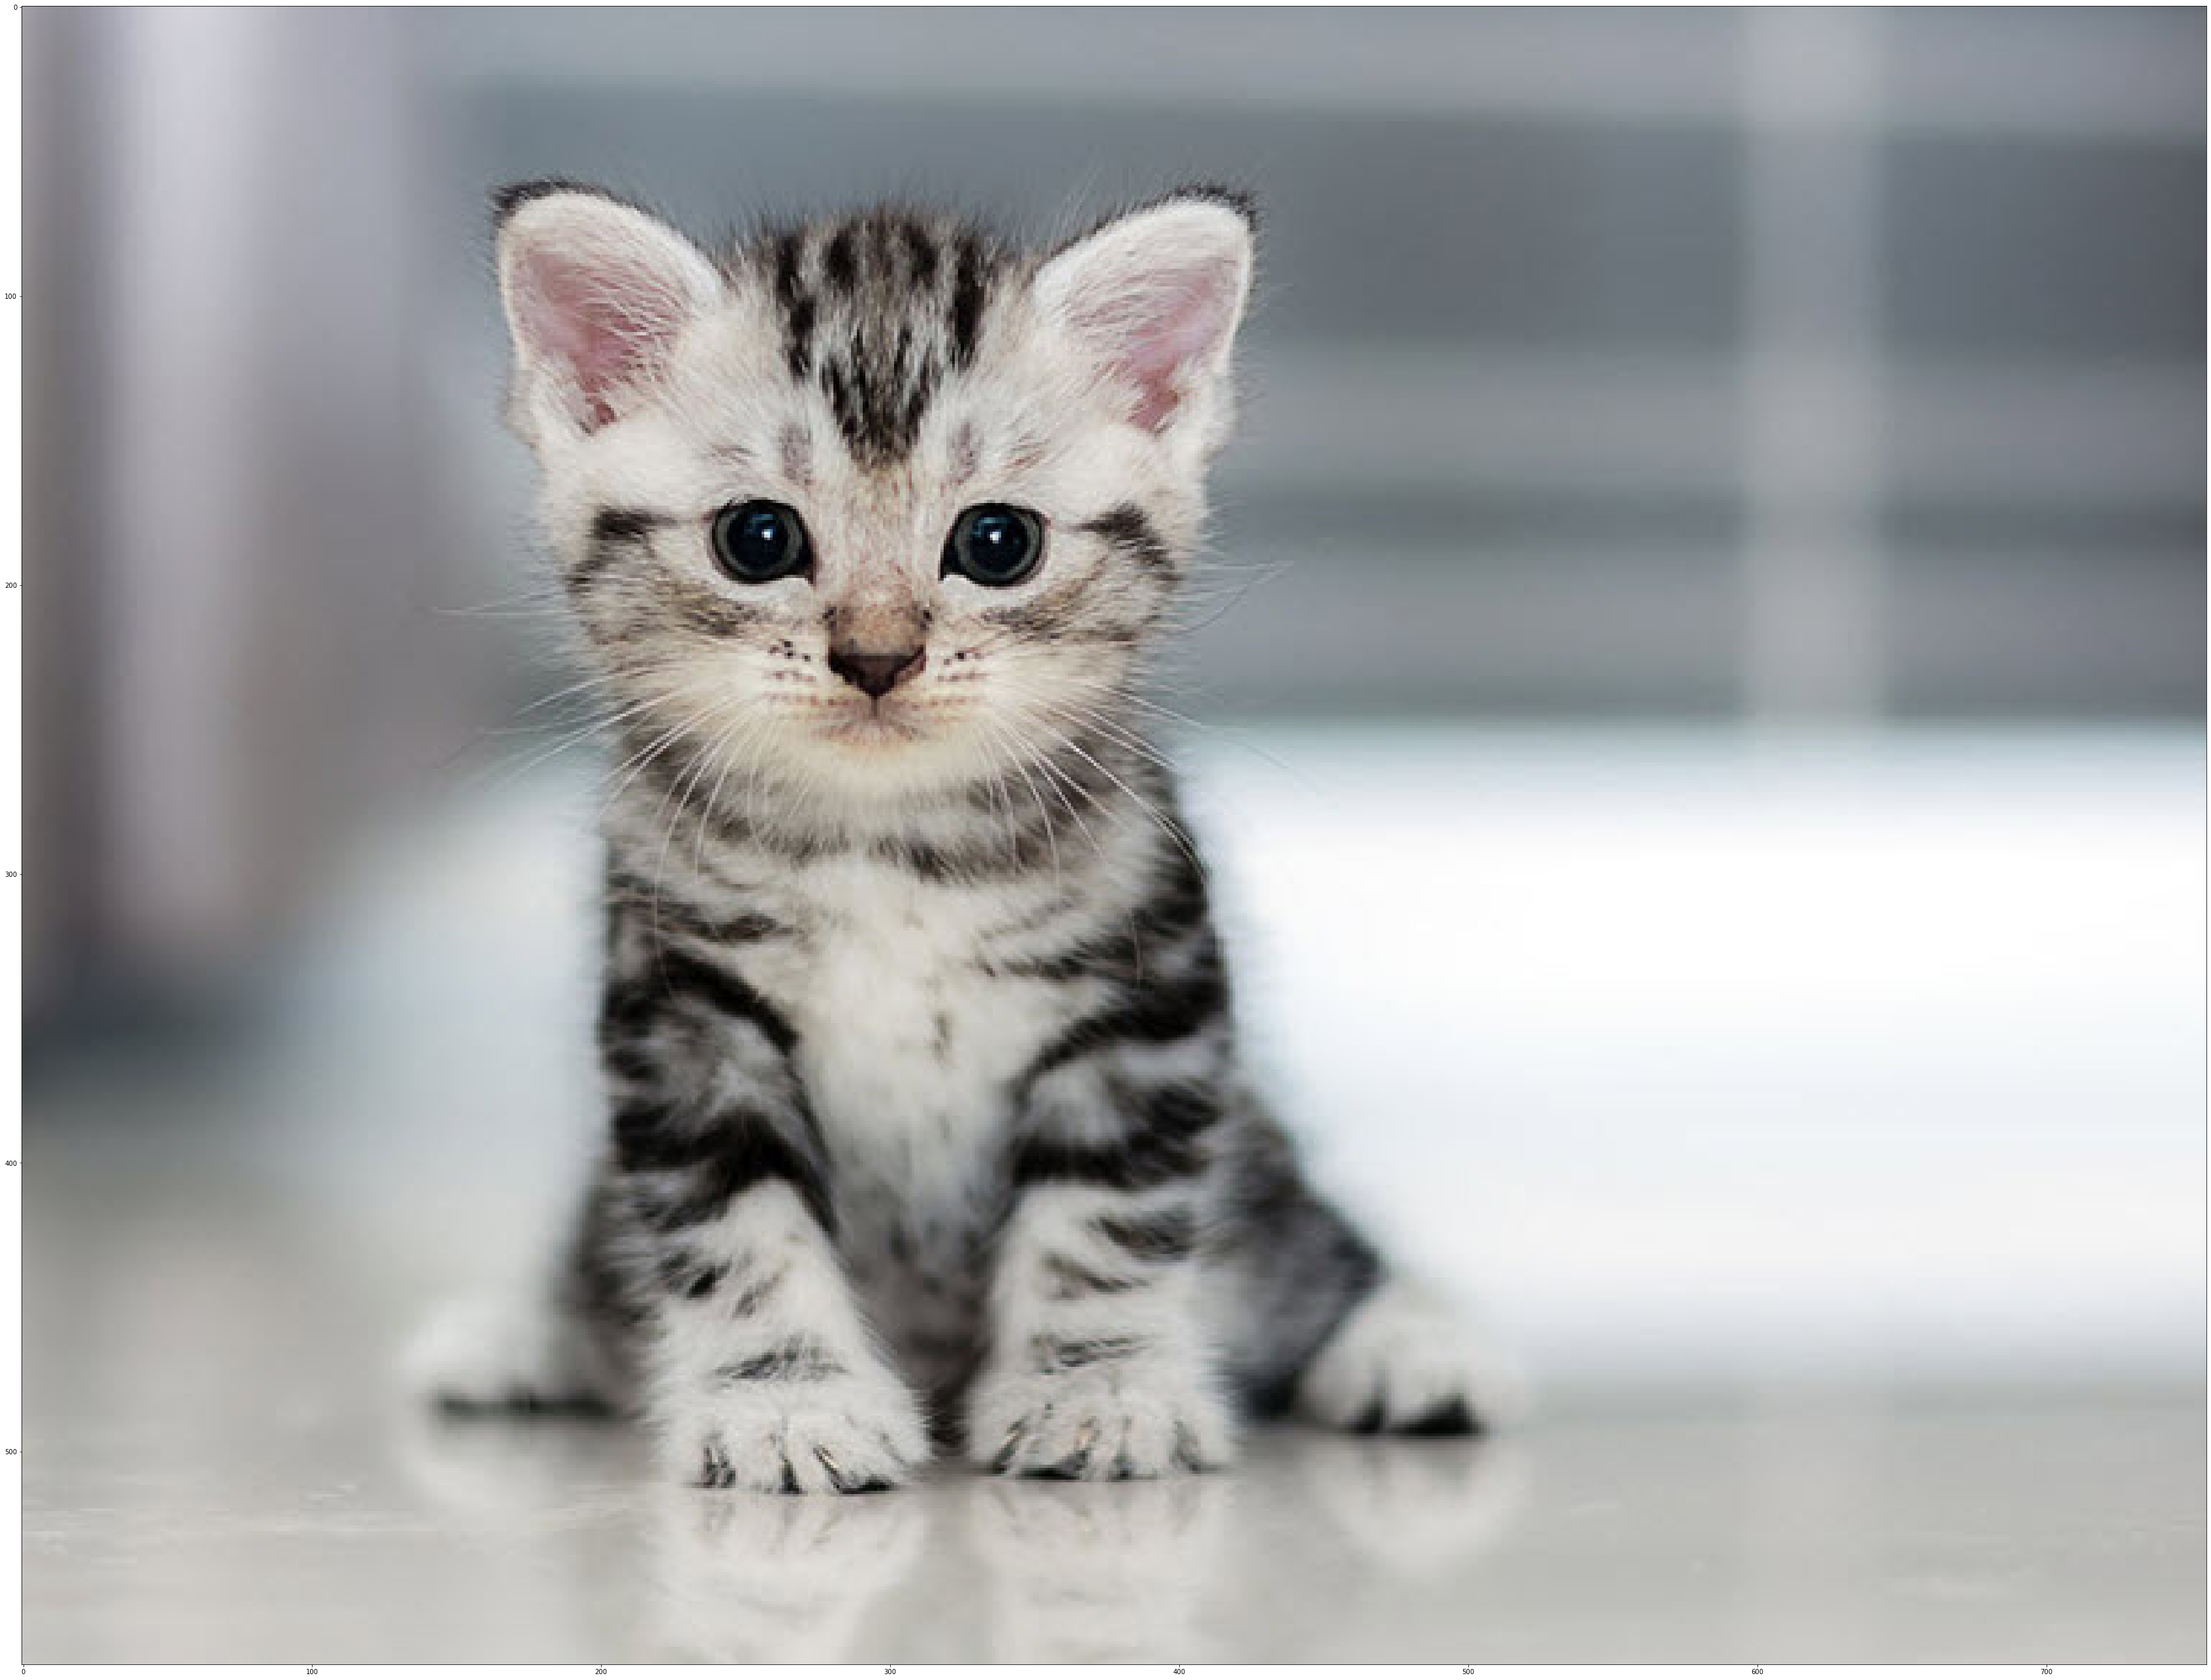

In [251]:
file_path = './cat-images/con-meo.jpg'
read_image_and_predict(file_path)